In [1]:
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib
import sys 
import cf_units 
from cf_units import Unit
import datetime
from iris.time import PartialDateTime


In [3]:
# params 
SIM = 60.0*60.0*24.0*30.0

directory = '/net/fs11/d0/jamiekel/PKU_PAH_emissions/'

# missing = PHE, BGHIP, ACY (some files present, others incomplete)
species = ['NAP', 'BaP', 'CHR', 'DahA', 'PYR', 'FLO', 'BaA', 'BbF', 'IcdP', 'BkF', 'FLA']
 
sectors = [['agriculture', 'agriculture'],
           ['deforestationwildfire', 'deforestation & wildfire'],
           ['energyproduction', 'enenergy'],
           ['industry', 'industry'],
           ['residentialcommercial', 'residential & commercial'],
           ['transportation', 'transportation']]

# sectors = [
#            ['deforestationwildfire', 'deforestation & wildfire'],
#            ['energyproduction', 'enenergy'],
#            ['industry', 'industry'],
#            ['residentialcommercial', 'residential & commercial'],
#            ['transportation', 'transportation']]

emission_totals = []

In [4]:
emission_totals

[]

In [5]:
path = directory + 'NAP_2014_agriculture.nc'
area = iris.load(path, ['Grid cell area (0.1 degree)'])[0]
area_m = area*1.0e6

for x in range(0, len(sectors)):
    dummy_list = []
    for y in range(0, len(species)):
        path = directory + species[y] + '_2014_' +  sectors[x][0] + '.nc'
        field = 'Gridded emission densities of ' + species[y]
        cubelist = iris.load(path, [field])[0]
        #print(type(cubelist))
        #print(field)
        
        # mask out the areas not desired from global files
        # Jamie regridded the emissions, which is not fast
        
        # perform conversions
        giga = cubelist*1.0e-9  # to gG 
        #print(giga, "giga\n")
        annual = giga.collapsed('time', iris.analysis.SUM) # collapse to annual cube
        #print(annual, "annual\n")
        cell = annual*area  # convert to total area per cell
        #print(cell, "cell\n")
        collapsed = (cell.collapsed(['latitude', 'longitude'], iris.analysis.SUM)).data # collapse over all lat/long
        #print(collapsed, "collapse\n")
        dummy_list.append(collapsed) # collapse again (?)
    emission_totals.append(dummy_list)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'emission' invalid units 'g ,NAP/km2/month'
  warnings.warn(msg)
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'YYYYMM'
  warnings.warn(msg)
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'emission' invalid units 'g ,NAP/km2/month'
  warnings.warn(msg)
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'YYYYMM'
  warnings.warn(msg)
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsi

In [6]:
emission_totals

[[array(14.487173, dtype=float32),
  array(0.07057719, dtype=float32),
  array(0.26811922, dtype=float32),
  array(0.09286839, dtype=float32),
  array(0.63966894, dtype=float32),
  array(0.27091774, dtype=float32),
  array(0.24598931, dtype=float32),
  array(0.2706668, dtype=float32),
  array(0.01039084, dtype=float32),
  array(0.10094412, dtype=float32),
  array(0.8042592, dtype=float32)],
 [array(20.320375, dtype=float32),
  array(0.20918113, dtype=float32),
  array(0.3326207, dtype=float32),
  array(0.37618372, dtype=float32),
  array(2.114819, dtype=float32),
  array(1.3771539, dtype=float32),
  array(0.329088, dtype=float32),
  array(0.09155019, dtype=float32),
  array(0.7166221, dtype=float32),
  array(0.2875443, dtype=float32),
  array(3.2063556, dtype=float32)],
 [array(0.2356072, dtype=float32),
  array(0.00558103, dtype=float32),
  array(0.00318607, dtype=float32),
  array(0.00432506, dtype=float32),
  array(0.01260103, dtype=float32),
  array(0.01514331, dtype=float32),
  ar

In [7]:
# load the mask for rerunning the above, just with a mask (write it up as a quick function)

mask = iris.load('/net/fs11/d0/jamiekel/PKU_PAH_emissions/HTAP/region_mask_Arctic_ext.nc')[0]

In [8]:
mask

<iris 'Cube' of source_code / (Degree) (latitude: 91; longitude: 144)>

In [9]:
# # save a copy to mess with
# emissions_total = masked 

# # set all non-LRTAP points to NaN
# for lat in range(0, lat_cube):
#     for long in range(0, long_cube):
#         if (mask.data[lat, long] != 4):
#             BAP_masked.data[lat, long] = float('nan')
# print(BAP_masked.data)

[ 0  1  2  3  4  5  6  7  8  9 10]


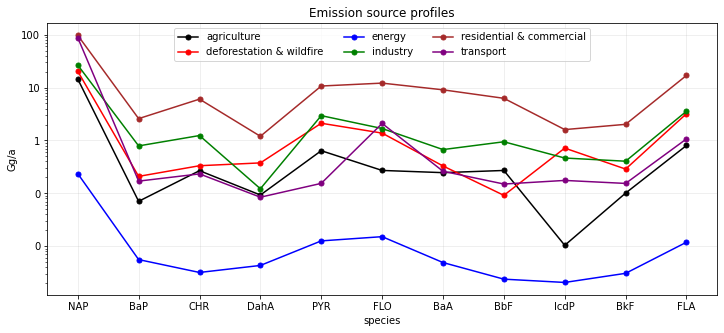

In [10]:
c_0 = 'black'
c_1 = 'lightcoral'
c_2 = 'lightsteelblue'
c_3 = 'slateblue'
c_4 = 'aqua'
c_5 = 'purple'

widths = 0.3

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Emission source profiles', fontsize=12)

number = len(species)
x_ax = np.arange(number)
print (x_ax)

ax1.plot(x_ax, emission_totals[0], markersize=5, marker='o', color='k', label='agriculture')
ax1.plot(x_ax, emission_totals[1], markersize=5, marker='o', color='r', label='deforestation & wildfire')
ax1.plot(x_ax, emission_totals[2], markersize=5, marker='o', color='b', label='energy')
ax1.plot(x_ax, emission_totals[3], markersize=5, marker='o', color='g', label='industry')
ax1.plot(x_ax, emission_totals[4], markersize=5, marker='o', color='brown', label='residential & commercial')
ax1.plot(x_ax, emission_totals[5], markersize=5, marker='o', color='purple', label='transport')

#ax1.plot(x_ax, sector_percentages[4], widths, bottom=bottom_4, color = c_4, linewidth=0, zorder=20, label='residential & commercial BB')
#ax1.plot(x_ax, sector_percentages[5], widths, bottom=bottom_5, color = c_5, linewidth=0, zorder=20, label='transportation')

ax1.set_xticks(x_ax)
ax1.set_xticklabels(species, fontsize=10)
ax1.set_ylabel('Gg/a')
ax1.set_xlabel('species')
#ax1.set_xlim(-0.5,len(sector_percentages[0])-0.5)
#ax1.set_ylim(0,130)
ax1.set_yscale('log')
#ax1.set_yticks(y_ticks)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='-', alpha=0.25, zorder=2)
plt.legend(loc='upper center', fontsize=10, ncol=3)

plt.savefig('Global_PAH_emission_sectors_profile.png', dpi=300)

In [ ]:
# TEQs stored in the same order as the PAHs
# drawn from Kelly et al. 2021 Table 3

teqs = [0.001,   #NAP
        1,       #BAP
        0.011,   #CHR
        3,       #DAHA
        0.065,   #PYR
        0.00075, #FLO
        0.35,    #BAA
        0.21,    #BBF
        0.08,    #ICDP
        0.03,    #BKF
        0.052,   #FLA
        0.00075, #PHE
        0.001,   #ACY
        0.01     #BGHIP
]

In [7]:
sectors

[['agriculture', 'agriculture'],
 ['deforestationwildfire', 'deforestation & wildfire'],
 ['energyproduction', 'enenergy'],
 ['industry', 'industry'],
 ['residentialcommercial', 'residential & commercial'],
 ['transportation', 'transportation']]

In [8]:
# visualize relative PAH contributions per region

# pass sector (str), normalized (bool), emits (list)
def _pie_maker(sector, normalized, emits):
    for item in range(0, len(sectors)):
        if sector == sectors[item][0]:
            #print(item, "index")
            
            # normalize against the sum of all emissions
            if (normalized == True):
                sector_pie = emits[item] / np.sum(emits[item])
                plt.pie(sector_pie)
                plt.legend(species)
                plt.show()
                
            # don't normalize
            if (normalized == False):
                sector_pie = emits[item]
                plt.pie(sector_pie)
                plt.legend(species)
                plt.show()

In [9]:
emission_totals[2]

IndexError: list index out of range

In [10]:
sectors

[['agriculture', 'agriculture'],
 ['deforestationwildfire', 'deforestation & wildfire'],
 ['energyproduction', 'enenergy'],
 ['industry', 'industry'],
 ['residentialcommercial', 'residential & commercial'],
 ['transportation', 'transportation']]

<ipython-input-11-c7f25dfb6d55>:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sector_pie)


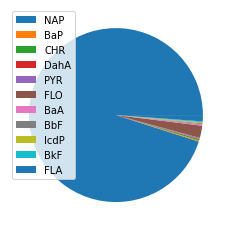

In [14]:
_pie_maker('transportation', True, emission_totals)

<ipython-input-9-c7f25dfb6d55>:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sector_pie)


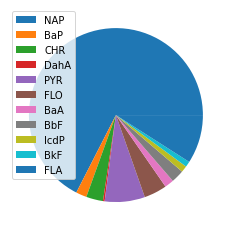

In [12]:
_pie_maker('industry', True, emission_totals)

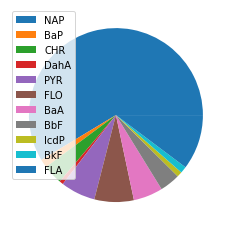

In [14]:
_pie_maker('residentialcommercial', True, emission_totals)

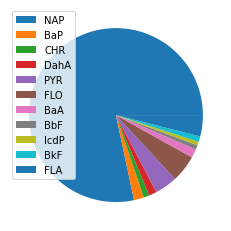

In [15]:
_pie_maker('energyproduction', True, emission_totals)

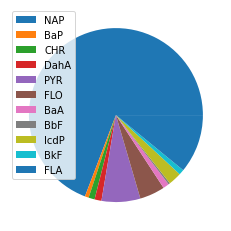

In [16]:
_pie_maker('deforestationwildfire', True, emission_totals)

<ipython-input-15-ace37ea8686b>:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ag_pie)


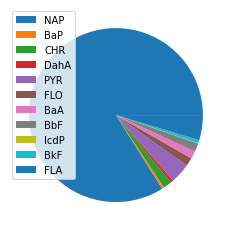

In [15]:
# agriculture

ag_pie = emission_totals[0] / np.sum(emission_totals[0])

plt.pie(ag_pie)
plt.legend(species)
plt.show() 

In [16]:
defor_pie = emission_totals[1] / np.sum(emission_totals[1])

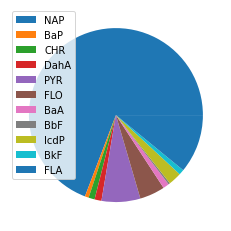

In [17]:
# deforestation and wildfire

plt.pie(defor_pie)
plt.legend(species)
plt.show() 

In [18]:
energy_pie = emission_totals[2] / np.sum(emission_totals[2])

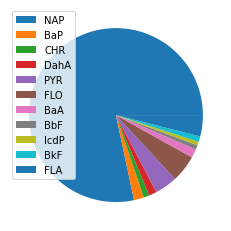

In [19]:
# energy
# sometimes have weird issues with pie charts in python

plt.pie(energy_pie)
plt.legend(species)
plt.show() 

In [20]:
sectors

[['agriculture', 'agriculture'],
 ['deforestationwildfire', 'deforestation & wildfire'],
 ['energyproduction', 'enenergy'],
 ['industry', 'industry'],
 ['residentialcommercial', 'residential & commercial'],
 ['transportation', 'transportation']]

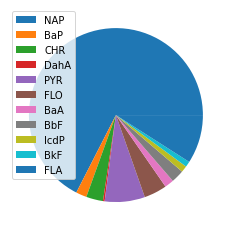

In [21]:
# industry

plt.pie(emission_totals[3])
plt.legend(species)
plt.show() 

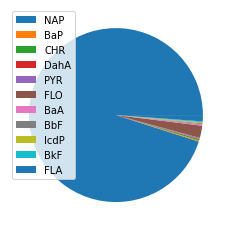

In [22]:
# residential and commercial

plt.pie(emission_totals[5])
plt.legend(species)
plt.show() 

<ipython-input-23-78d250c02187>:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(transport_pie)


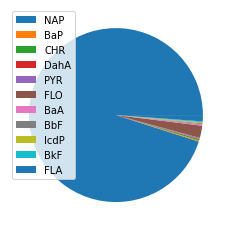

In [23]:
# transport, normalized

transport_pie = emission_totals[5] / np.sum(emission_totals[5])
plt.pie(transport_pie)
plt.legend(species)
plt.show()

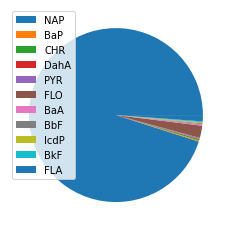

In [24]:
# transport, not normalized

plt.pie(emission_totals[5])
plt.legend(species)
plt.show() 

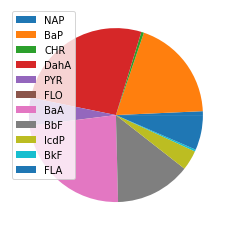

In [30]:
# generate pie charts with TEQs incorporated
# test with transportation

nap_teq = emission_totals[4][0] * 0.001
bap_teq = emission_totals[4][1]
chr_teq = emission_totals[4][2] * 0.011
daha_teq = emission_totals[4][3] * 3
pyr_teq = emission_totals[4][4] * 0.065
flo_teq = emission_totals[4][5] * 0.00075
baa_teq = emission_totals[4][6] * 0.35
bbf_teq = emission_totals[4][6] * 0.210000
icdp_teq = emission_totals[4][7] * 0.08
bkf_teq = emission_totals[4][8] * 0.03
fla_teq = emission_totals[4][10] * 0.052

transport_teq = [nap_teq, bap_teq, chr_teq, daha_teq, pyr_teq, flo_teq, baa_teq, bbf_teq, icdp_teq, bkf_teq, fla_teq]

transport_teq_pie = transport_teq / np.sum(transport_teq)
plt.pie(transport_teq_pie)
plt.legend(species)
plt.show()

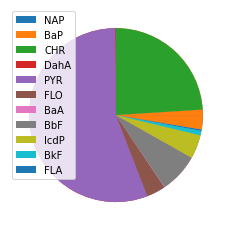

In [26]:
# generate pie charts with TEQs incorporated
# test with energy

nap_teq_energy = emission_totals[2][0] * 0.001
bap_teq_energy = emission_totals[2][1]
chr_teq_energy = emission_totals[2][2] * 0.011
daha_teq_energy = emission_totals[2][3] * 3
pyr_teq_energy = emission_totals[2][4] * 0.065
flo_teq_energy = emission_totals[2][5] * 0.00075
baa_teq_energy = emission_totals[2][6] * 0.35
bbf_teq_energy = emission_totals[2][6] * 0.210000
icdp_teq_energy = emission_totals[2][7] * 0.08
bkf_teq_energy = emission_totals[2][8] * 0.03
fla_teq_energy = emission_totals[2][10] * 0.052

energy_teq = [nap_teq_energy, 
              bap_teq_energy, 
              chr_teq_energy, 
              daha_teq_energy, 
              pyr_teq_energy,
              flo_teq_energy,
              baa_teq_energy,
              bbf_teq_energy,
              icdp_teq_energy,
              bkf_teq_energy,
              fla_teq_energy]

energy_teq_pie = energy_teq / np.sum(energy_teq)
plt.pie(energy_teq_pie)

plt.pie(energy_teq_pie)
plt.legend(species)
plt.show()

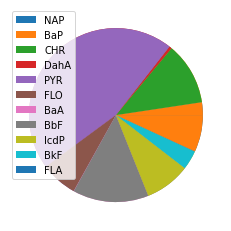

In [27]:
# generate pie charts with TEQs incorporated
# test with agriculture

nap_teq_ag = emission_totals[0][0] * 0.001
bap_teq_ag = emission_totals[0][1]
chr_teq_ag = emission_totals[0][2] * 0.011
daha_teq_ag = emission_totals[0][3] * 3
pyr_teq_ag = emission_totals[0][4] * 0.065
flo_teq_ag = emission_totals[0][5] * 0.00075
baa_teq_ag = emission_totals[0][6] * 0.35
bbf_teq_ag = emission_totals[0][6] * 0.210000
icdp_teq_ag = emission_totals[0][7] * 0.08
bkf_teq_ag = emission_totals[0][8] * 0.03
fla_teq_ag = emission_totals[0][10] * 0.052

# ag_teq = [nap_teq_ag, bap_teq_ag, chr_teq_ag, daha_teq_ag, pyr_teq_ag, flo_teq_ag]

ag_teq = [nap_teq_ag, 
          bap_teq_ag, 
          chr_teq_ag, 
          daha_teq_ag, 
          pyr_teq_ag,
          flo_teq_ag,
          baa_teq_ag,
          bbf_teq_ag,
          icdp_teq_ag,
          bkf_teq_ag,
          fla_teq_ag]

ag_teq_pie = ag_teq / np.sum(ag_teq)
plt.pie(ag_teq_pie)

plt.pie(ag_teq_pie)
plt.legend(species)
plt.show()

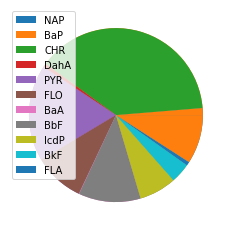

In [29]:
# generate pie charts with TEQs incorporated
# test with agriculture

nap_teq_in = emission_totals[3][0] * 0.001
bap_teq_in = emission_totals[3][1]
chr_teq_in = emission_totals[3][2] * 0.011
daha_teq_in = emission_totals[3][3] * 3
pyr_teq_in = emission_totals[3][4] * 0.065
flo_teq_in = emission_totals[3][5] * 0.00075
baa_teq_in = emission_totals[3][6] * 0.35
bbf_teq_in = emission_totals[3][6] * 0.210000
icdp_teq_in = emission_totals[3][7] * 0.08
bkf_teq_in = emission_totals[3][8] * 0.03
fla_teq_in = emission_totals[3][10] * 0.052

# ag_teq = [nap_teq_ag, bap_teq_ag, chr_teq_ag, daha_teq_ag, pyr_teq_ag, flo_teq_ag]

in_teq = [nap_teq_in, 
          bap_teq_in, 
          chr_teq_in, 
          daha_teq_in, 
          pyr_teq_in,
          flo_teq_in,
          baa_teq_in,
          bbf_teq_in,
          icdp_teq_in,
          bkf_teq_in,
          fla_teq_in]

in_teq_pie = in_teq / np.sum(in_teq)
plt.pie(in_teq_pie)

plt.pie(in_teq_pie)
plt.legend(species)
plt.show()

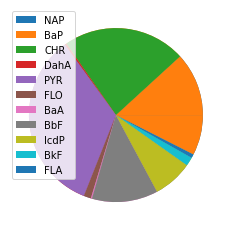

In [33]:
# generate pie charts with TEQs incorporated
# test with agriculture

nap_teq_re = emission_totals[5][0] * 0.001
bap_teq_re = emission_totals[5][1]
chr_teq_re = emission_totals[5][2] * 0.011
daha_teq_re = emission_totals[5][3] * 3
pyr_teq_re = emission_totals[5][4] * 0.065
flo_teq_re = emission_totals[5][5] * 0.00075
baa_teq_re = emission_totals[5][6] * 0.35
bbf_teq_re = emission_totals[5][6] * 0.210000
icdp_teq_re = emission_totals[5][7] * 0.08
bkf_teq_re = emission_totals[5][8] * 0.03
fla_teq_re = emission_totals[5][10] * 0.052

# ag_teq = [nap_teq_ag, bap_teq_ag, chr_teq_ag, daha_teq_ag, pyr_teq_ag, flo_teq_ag]

re_teq = [nap_teq_re, 
          bap_teq_re, 
          chr_teq_re, 
          daha_teq_re, 
          pyr_teq_re,
          flo_teq_re,
          baa_teq_re,
          bbf_teq_re,
          icdp_teq_re,
          bkf_teq_re,
          fla_teq_re]

re_teq_pie = re_teq / np.sum(re_teq)
plt.pie(re_teq_pie)

plt.pie(re_teq_pie)
plt.legend(species)
plt.show()

In [34]:
sectors

[['agriculture', 'agriculture'],
 ['deforestationwildfire', 'deforestation & wildfire'],
 ['energyproduction', 'enenergy'],
 ['industry', 'industry'],
 ['residentialcommercial', 'residential & commercial'],
 ['transportation', 'transportation']]